# 時間處理

在金融中最常遇到的資料類型是「時間」，Python中處理時間的主要工具就是<font color='green'>pandas</font>。pandas的主要作者在大型對沖基金AQR資本管理公司擔任分析師時開始開發這個library

### pandas基礎

In [1]:
import numpy as np
import pandas as pd

pandas中的DataFrame物件設計用來管理具有索引和標籤的數據，跟SQL或execl的工作表內數據非常相似，別且能將之整齊的印出來

In [2]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [4]:
df.columns

Index([u'numbers'], dtype='object')

In [5]:
df.ix['c'] #透過index取得值

numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a', 'd']]

,numbers
a,10
d,40


In [7]:
df.ix[df.index[1:3]]

,numbers
b,20
c,30


In [8]:
df.sum()

numbers    100
dtype: int64

In [9]:
df.apply(lambda x: x ** 2)

,numbers
a,100
b,400
c,900
d,1600


也能進行向量操作

In [10]:
df * 2

,numbers
a,20
b,40
c,60
d,80


增加column也是可行的

In [11]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [12]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


增加一個row

In [13]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


索引會被簡單索引所代替，所以提供一個正確的索引是比較好的做法

In [14]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index = ['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


pandas也能夠處理缺漏的訊息，我們用join再加一個column

In [15]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares']))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


沒有y這個索引，所以沒有顯示

In [16]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares']), how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


<font color='green'>how='outer'</font>表示使用這個索引值的連集

儘管有丟失的值，但使用大部分的method還是有效

In [17]:
df[['numbers','squares']].mean()

numbers    40.0
squares    11.0
dtype: float64

#### 從現在開始，我們將會處理數值數據

為了生成一個模擬的數據，按照下面的例子，生成一個9*4的標準常態分佈隨機變數

In [18]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.195433, -1.208073, -2.016731, -1.257739],
       [ 0.401767, -1.494334,  0.033467, -0.745078],
       [ 0.471878,  0.272969, -0.033505,  0.853614],
       [ 0.04519 , -1.059216,  0.28988 , -0.905577],
       [-0.79279 , -0.697713,  0.838982, -0.923513],
       [-0.73514 ,  0.208995,  1.200148,  0.85808 ],
       [ 0.360479,  0.835475,  1.171858, -0.254723],
       [-0.689141, -0.505373, -0.245916,  1.315167],
       [-1.595798,  0.761416,  0.34632 , -1.092215]])

轉成DataFrame結構

In [19]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.195433,-1.208073,-2.016731,-1.257739
1,0.401767,-1.494334,0.033467,-0.745078
2,0.471878,0.272969,-0.033505,0.853614
3,0.045190,-1.059216,0.289880,-0.905577
4,-0.792790,-0.697713,0.838982,-0.923513
5,-0.735140,0.208995,1.200148,0.858080
6,0.360479,0.835475,1.171858,-0.254723
7,-0.689141,-0.505373,-0.245916,1.315167
8,-1.595798,0.761416,0.346320,-1.092215


In [20]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.195433,-1.208073,-2.016731,-1.257739
1,0.401767,-1.494334,0.033467,-0.745078
2,0.471878,0.272969,-0.033505,0.853614
3,0.045190,-1.059216,0.289880,-0.905577
4,-0.792790,-0.697713,0.838982,-0.923513
5,-0.735140,0.208995,1.200148,0.858080
6,0.360479,0.835475,1.171858,-0.254723
7,-0.689141,-0.505373,-0.245916,1.315167
8,-1.595798,0.761416,0.346320,-1.092215


In [21]:
df['No1'][0]

-0.19543345817342828

為了高效率處理金融事件的數據，必須很好地處理時間索引，這也是pandas的重要優勢，例如，假設我們分為剛剛四行的數據集對應於2015年1月開始9個月的月底數據，然後，用date_range生成一個DatetimeIndex物件

In [22]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [23]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.195433,-1.208073,-2.016731,-1.257739
2015-02-28,0.401767,-1.494334,0.033467,-0.745078
2015-03-31,0.471878,0.272969,-0.033505,0.853614
2015-04-30,0.045190,-1.059216,0.289880,-0.905577
2015-05-31,-0.792790,-0.697713,0.838982,-0.923513
2015-06-30,-0.735140,0.208995,1.200148,0.858080
2015-07-31,0.360479,0.835475,1.171858,-0.254723
2015-08-31,-0.689141,-0.505373,-0.245916,1.315167
2015-09-30,-1.595798,0.761416,0.346320,-1.092215


[date_range函式頻率參數值](http://stackoverflow.com/questions/17001389/pandas-resample-documentation)

#### 基本分析

跟Numpy一樣，我們可以利用DataFrame中的很多便利的內建method，例如sum, mean等等

In [24]:
df.sum()

No1   -2.728989
No2   -2.885853
No3    1.584504
No4   -2.151984
dtype: float64

In [25]:
df.mean()

No1   -0.303221
No2   -0.320650
No3    0.176056
No4   -0.239109
dtype: float64

In [26]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.195433,-1.208073,-2.016731,-1.257739
2015-02-28,0.206334,-2.702406,-1.983263,-2.002817
2015-03-31,0.678211,-2.429438,-2.016768,-1.149203
2015-04-30,0.723401,-3.488653,-1.726889,-2.054780
2015-05-31,-0.069388,-4.186366,-0.887906,-2.978293
2015-06-30,-0.804529,-3.977372,0.312242,-2.120213
2015-07-31,-0.444050,-3.141897,1.484100,-2.374936
2015-08-31,-1.133191,-3.647269,1.238183,-1.059769
2015-09-30,-2.728989,-2.885853,1.584504,-2.151984


最強大的還是<font color='red'>describe</font>method，他可以一次顯示多種常用的統計數字

In [27]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.303221,-0.320650,0.176056,-0.239109
std,0.699751,0.867988,0.972910,0.984116
min,-1.595798,-1.494334,-2.016731,-1.257739
25%,-0.735140,-1.059216,-0.033505,-0.923513
50%,-0.195433,-0.505373,0.289880,-0.745078
75%,0.360479,0.272969,0.838982,0.853614
max,0.471878,0.835475,1.200148,1.315167


或要繪製圖表，只需要一行程式碼

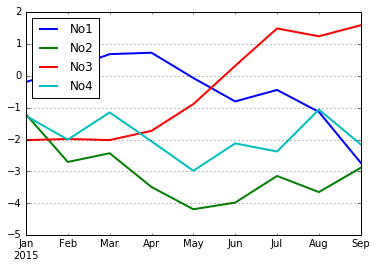

In [28]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)

### Series物件

目前，我們主要是使用DataFrame

In [29]:
type(df)

pandas.core.frame.DataFrame

但還有一個好用的Series類別，例如，我們從DataFrame物件中選擇單一個column時，我們就會得到一個Series物件

In [30]:
df['No1']

2015-01-31   -0.195433
2015-02-28    0.401767
2015-03-31    0.471878
2015-04-30    0.045190
2015-05-31   -0.792790
2015-06-30   -0.735140
2015-07-31    0.360479
2015-08-31   -0.689141
2015-09-30   -1.595798
Freq: M, Name: No1, dtype: float64

In [31]:
type(df['No1'])

pandas.core.series.Series

DataFrame的主要method也可以用在Series，例如，我們想要繪製圖表

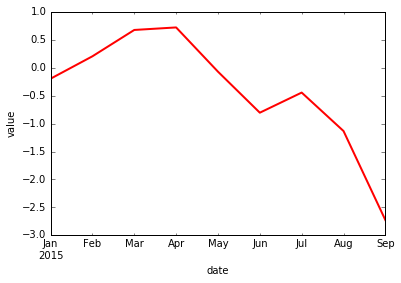

In [32]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

#### Groupby操作

pandas具有強大的分組功能，方式有點類似SQL，為了分組，我們添加一行，表示數據的季度

In [33]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q3', 'Q2', 'Q4', 'Q3', 'Q2']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.195433,-1.208073,-2.016731,-1.257739,Q1
2015-02-28,0.401767,-1.494334,0.033467,-0.745078,Q1
2015-03-31,0.471878,0.272969,-0.033505,0.853614,Q1
2015-04-30,0.045190,-1.059216,0.289880,-0.905577,Q2
2015-05-31,-0.792790,-0.697713,0.838982,-0.923513,Q3
2015-06-30,-0.735140,0.208995,1.200148,0.858080,Q2
2015-07-31,0.360479,0.835475,1.171858,-0.254723,Q4
2015-08-31,-0.689141,-0.505373,-0.245916,1.315167,Q3
2015-09-30,-1.595798,0.761416,0.346320,-1.092215,Q2


現在，我們根據Quarter分組

In [34]:
groups = df.groupby('Quarter')
groups

In [35]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.226070,-0.809813,-0.672256,-0.383068
Q2,-0.761916,-0.029602,0.612116,-0.379904
Q3,-0.740966,-0.601543,0.296533,0.195827
Q4,0.360479,0.835475,1.171858,-0.254723


In [36]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.471878,0.272969,0.033467,0.853614
Q2,0.045190,0.761416,1.200148,0.858080
Q3,-0.689141,-0.505373,0.838982,1.315167
Q4,0.360479,0.835475,1.171858,-0.254723


In [37]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    2
Q4    1
dtype: int64

分組也可以根據多行分組，為此我們再多加一行，表示索引日期的月份是奇數還是偶數

In [38]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [39]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         1
Q4       Odd         1
dtype: int64

In [40]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      0.401767 -1.494334  0.033467 -0.745078
        Odd       0.138222 -0.467552 -1.025118 -0.202062
Q2      Even     -0.344975 -0.425111  0.745014 -0.023748
        Odd      -1.595798  0.761416  0.346320 -1.092215
Q3      Even     -0.689141 -0.505373 -0.245916  1.315167
        Odd      -0.792790 -0.697713  0.838982 -0.923513
Q4      Odd       0.360479  0.835475  1.171858 -0.254723

### 金融數據

Web提供了許多免費的金融數據，為此，我們將使用pandas內建函數DataReader從[Yahoo財金網站](http://finance.yahoo.com)讀取股價數據，分析數據並產生不同的圖表

In [41]:
import pandas.io.data as web

/Users/andy/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


目前pandas支持以下[數據](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)
+ yahoo財經
+ google財經
+ St.Louis FED (FRED)
+ Kenneth French’s data library
+ 世界銀行
+ Google analytics  

例如，我們可以讀取Apple的股價訊息

In [42]:
AAPL = web.DataReader(name='AAPL', data_source='yahoo', start='2000-01-01')

In [43]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4190 entries, 2000-01-03 to 2016-08-26
Data columns (total 6 columns):
Open         4190 non-null float64
High         4190 non-null float64
Low          4190 non-null float64
Close        4190 non-null float64
Volume       4190 non-null int64
Adj Close    4190 non-null float64
dtypes: float64(5), int64(1)
memory usage: 229.1 KB


In [44]:
AAPL.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [45]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.874997,112.499998,101.687501,111.937502,133949200,3.660058
2000-01-04,108.250001,110.625002,101.187503,102.500003,128094400,3.351477
2000-01-05,103.749998,110.562497,103.000001,103.999997,194580400,3.400523
2000-01-06,106.124999,106.999999,94.999998,94.999998,191993200,3.106247
2000-01-07,96.499999,101.000002,95.500003,99.500001,115183600,3.253385


In [46]:
AAPL.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-08-22,108.860001,109.099998,107.849998,108.510002,25820200,108.510002
2016-08-23,108.589996,109.320000,108.529999,108.849998,21257700,108.849998
2016-08-24,108.570000,108.750000,107.680000,108.029999,23675100,108.029999
2016-08-25,107.389999,107.879997,106.680000,107.570000,25086200,107.570000
2016-08-26,107.410004,107.949997,106.309998,106.940002,27704400,106.940002


我們用plot生成一個圖表

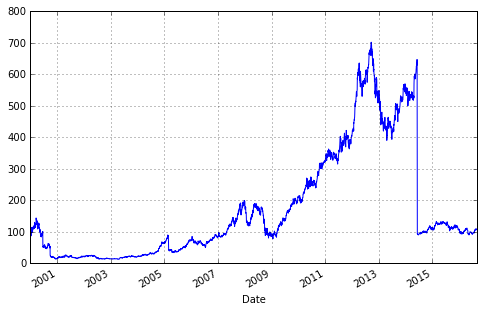

In [47]:
AAPL['Close'].plot(figsize=(8, 5), grid=True)